Matplotlib is building the font cache; this may take a moment.


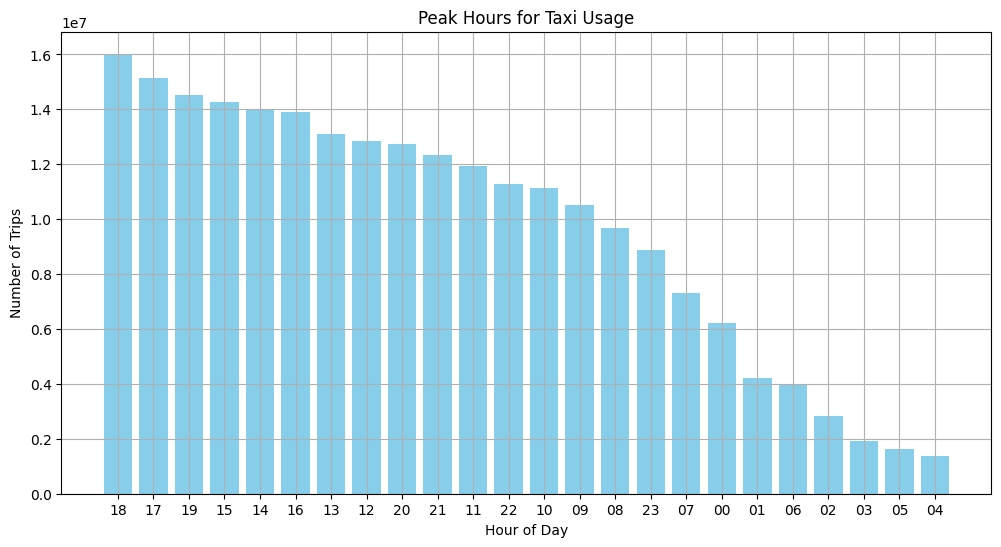

In [3]:
### What are the peak hours for taxi usage?
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('taxi_data.db')

# SQL query to find peak hours for taxi usage
peak_hours_query = """
SELECT strftime('%H', tpep_pickup_datetime) AS hour, COUNT(*) AS trip_count
FROM trips
GROUP BY hour
ORDER BY trip_count DESC;
"""

# Execute the query and load the results into a DataFrame
peak_hours_df = pd.read_sql_query(peak_hours_query, conn)

# Plot the peak hours
plt.figure(figsize=(12, 6))
plt.bar(peak_hours_df['hour'], peak_hours_df['trip_count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Peak Hours for Taxi Usage')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Close the connection
conn.close()

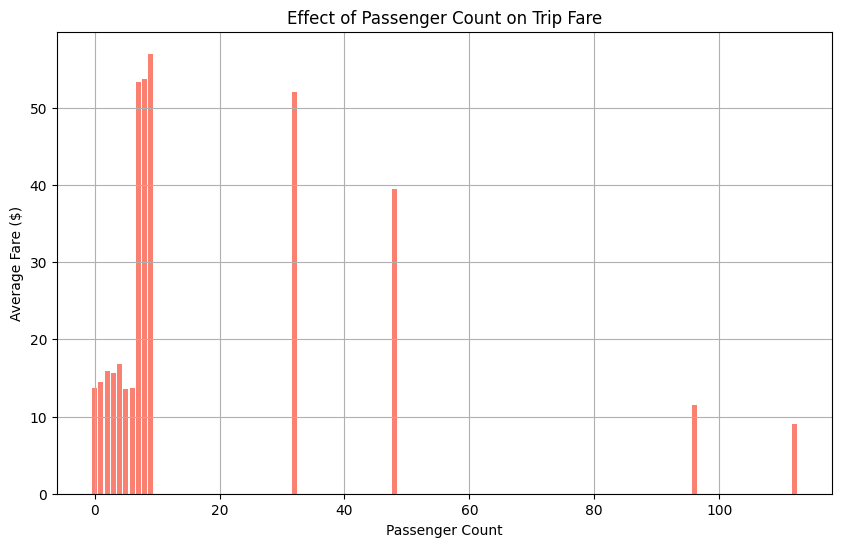

In [4]:
### How does passenger count affect the trip fare?
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('taxi_data.db')

# SQL query to find the effect of passenger count on trip fare
passenger_fare_query = """
SELECT passenger_count, AVG(fare_amount) AS average_fare
FROM trips
GROUP BY passenger_count
ORDER BY passenger_count;
"""

# Execute the query and load the results into a DataFrame
passenger_fare_df = pd.read_sql_query(passenger_fare_query, conn)

# Plot the effect of passenger count on trip fare
plt.figure(figsize=(10, 6))
plt.bar(passenger_fare_df['passenger_count'], passenger_fare_df['average_fare'], color='salmon')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare ($)')
plt.title('Effect of Passenger Count on Trip Fare')
plt.grid(True)
plt.show()

# Close the connection
conn.close()

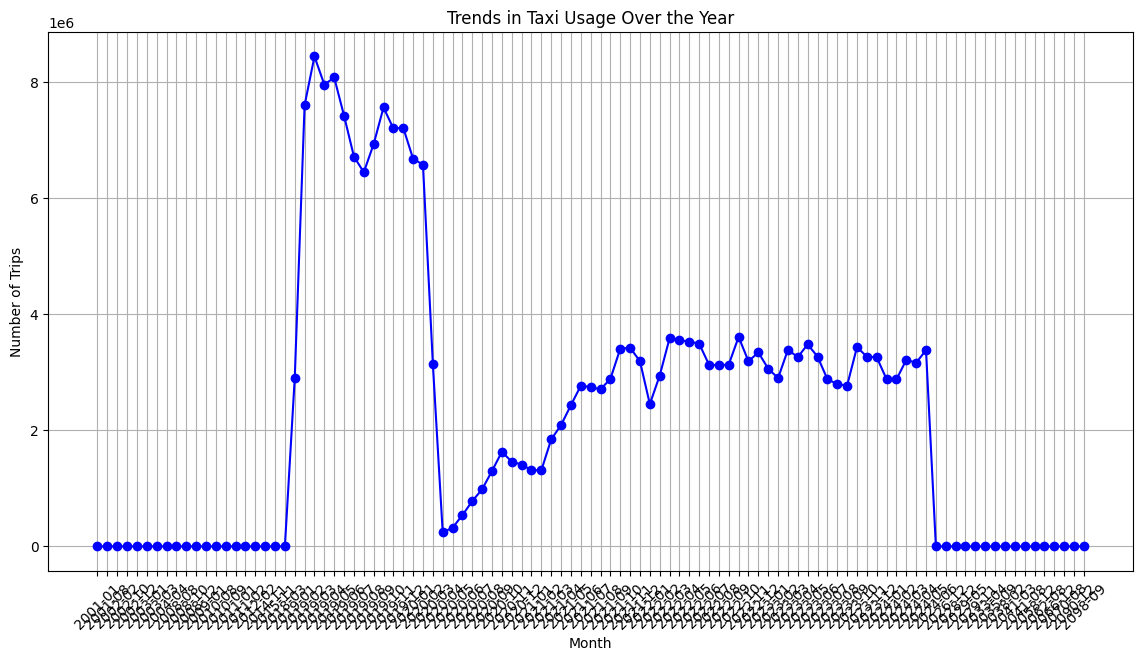

In [6]:
### What are the trends in usage over the year?
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('taxi_data.db')

# SQL query to find trends in usage over the year
usage_trends_query = """
SELECT strftime('%Y-%m', tpep_pickup_datetime) AS month, COUNT(*) AS trip_count
FROM trips
GROUP BY month
ORDER BY month;
"""

# Execute the query and load the results into a DataFrame
usage_trends_df = pd.read_sql_query(usage_trends_query, conn)

# Plot the trends in usage over the year
plt.figure(figsize=(14, 7))
plt.plot(usage_trends_df['month'], usage_trends_df['trip_count'], marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trends in Taxi Usage Over the Year')
plt.xticks(ticks=range(len(usage_trends_df['month'])), labels=usage_trends_df['month'], rotation=45)
plt.grid(True)
plt.show()

# Close the connection
conn.close()